In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix


## Business Understanding Statement:

The Binary Diabetes Health Indicators provides an understanding of different health indicators that can impact the risk of diabetes and prediabetes among a general population. By analyzing different factors such as high blood pressure, cholesterol levels, physical activity, reported general health, diatery habits, and income, healthcare providers can identify high-risk individuals and recommend preventive measures and interventions. his information is critical for developing targeted health programs, improving patient outcomes, and reducing the overall burden of diabetes on the healthcare system. The dataset's detailed health metrics and demographic information offer valuable insights for creating effective health strategies and promoting healthier lifestyles.


## Description of Columns in Diabetes Dataset

| Variable Name | Role | Type | Description | Missing Values
| --- | --- | --- | --- | --- | 
ID |	ID	|Integer	|	Patient ID	|	no
Diabetes_binary|	Target	|Binary	|	0 = no diabetes 1 = prediabetes or diabetes	|	no
HighBP|	Feature	|Binary	|	0 = no high BP 1 = high BP	|	no
HighChol	|Feature	|Binary		|0 = no high cholesterol 1 = high cholesterol	|	no
CholCheck|	Feature	|Binary	|	0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years	|	no
BMI|	Feature	|Integer		|Body Mass Index	|	no
Smoker|	Feature|	Binary	|	Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes|		no
Stroke	|Feature|	Binary	|	(Ever told) you had a stroke. 0 = no 1 = yes|		no
HeartDiseaseorAttack|	Feature|	Binary	|	coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes	|	no
PhysActivity|	Feature|	Binary	|	physical activity in past 30 days - not including job 0 = no 1 = yes|	no
Fruits|	Feature	|Binary	|	Consume Fruit 1 or more times per day 0 = no 1 = yes	|	no
Veggies	|Feature|	Binary|		Consume Vegetables 1 or more times per day 0 = no 1 = yes	|	no
HvyAlcoholConsump	|Feature	|Binary		|Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes		|no
AnyHealthcare|	Feature|	Binary	|	Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes		|no
NoDocbcCost|	Feature|	Binary	|	Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes|		no
GenHlth	|Feature	|Integer	|	Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor |		no
MentHlth	|Feature	|Integer|		Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days		|no
PhysHlth|	Feature|	Integer	|	Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days |		no
DiffWalk	|Feature |	Binary|		Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes		|no
Sex|	Feature|	Binary|	Sex	0 = female 1 = male	|	no

This dataset pertains to patient health indicators and includes both demographic and health-related features. Each entry is uniquely identified by a patient ID (ID). The primary target variable, Diabetes_binary, indicates the presence of diabetes or prediabetes. Various binary features capture health conditions and behaviors, such as high blood pressure (HighBP), high cholesterol (HighChol), smoking history (Smoker), history of stroke (Stroke), and coronary heart disease or myocardial infarction (HeartDiseaseorAttack). Additional features track physical activity (PhysActivity), dietary habits (Fruits and Veggies), heavy alcohol consumption (HvyAlcoholConsump), and access to healthcare (AnyHealthcare, NoDocbcCost). General health status is assessed using a scale (GenHlth), and mental and physical health issues are quantified by the number of days affected in the past month (MentHlth, PhysHlth). The dataset also includes information on difficulties with walking (DiffWalk) and the sex of the patient (Sex). All these features are essential for analyzing and predicting diabetes risk, with no missing values reported.

In [84]:
diabetes = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [85]:
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [86]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Data Cleaning and Preprocessing: 

In [87]:
missing_values = diabetes.isnull().sum()
print(missing_values)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


#### There are no NULL values so there is no need to drop missing values.

In [88]:
# Check for duplicates
duplicates = diabetes.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 24206


In [89]:
#There are some duplicate rows so we will drop them.
# Remove duplicates
diabetes.drop_duplicates(inplace=True)

In [90]:
# Summary statistics
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Exploratory Data Analysis (EDA): 

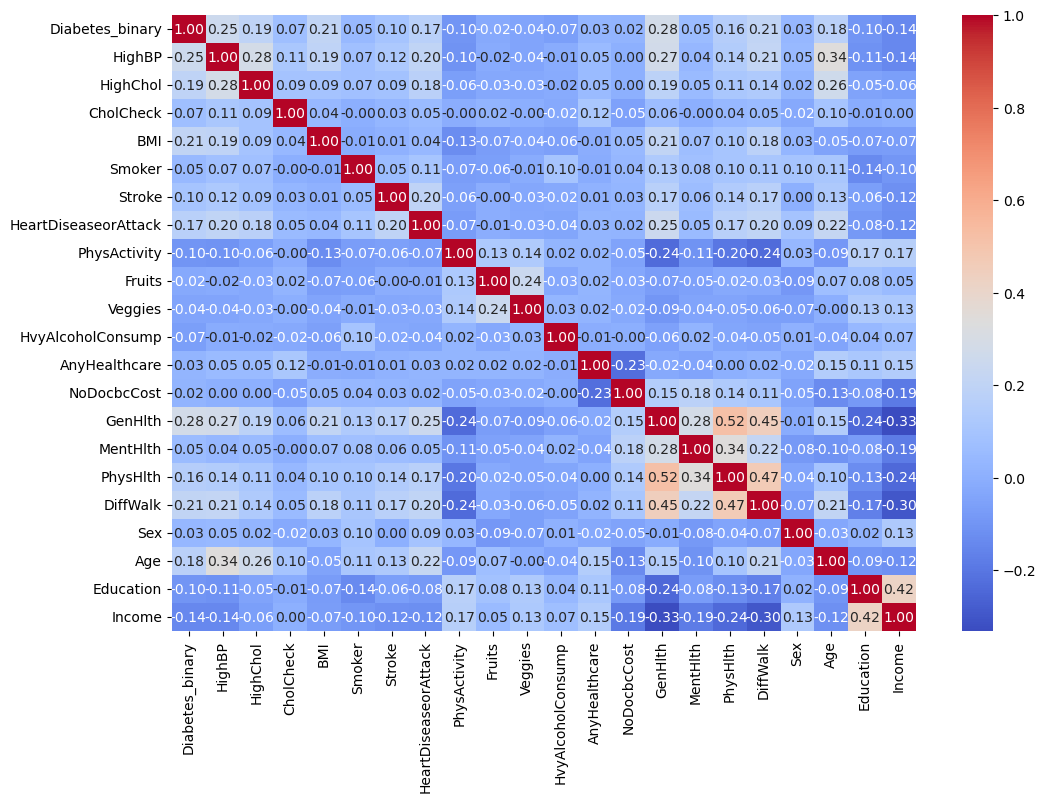

In [91]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.savefig(f'images/heatmap.png')
plt.show()

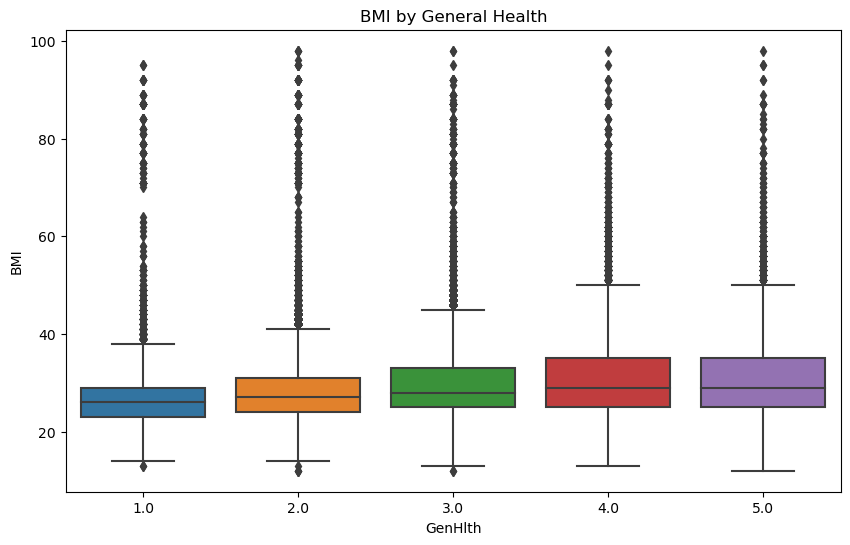

In [92]:
# Box plot for BMI by General Health
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes, x='GenHlth', y='BMI')
plt.title('BMI by General Health')
plt.show()

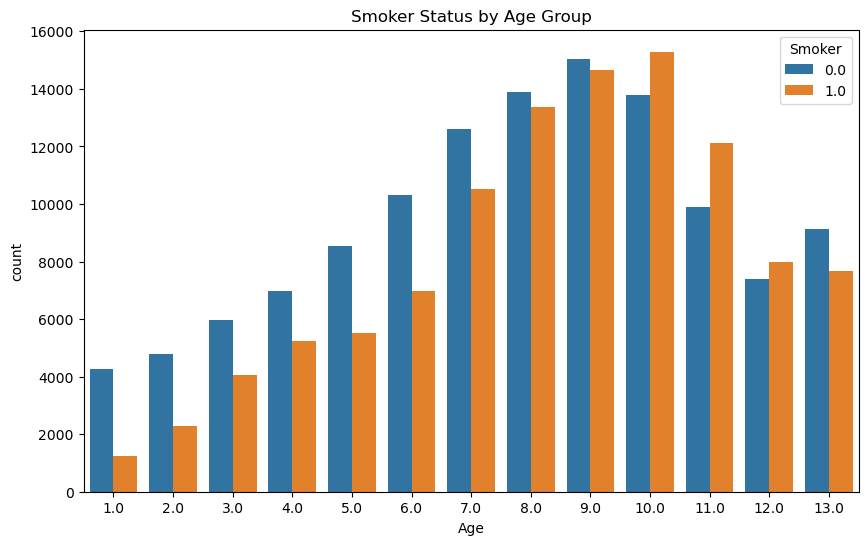

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetes, x=diabetes['Age'], hue='Smoker')
plt.title('Smoker Status by Age Group')
plt.show()

In [94]:
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                    'DiffWalk', 'Sex','GenHlth']
continuous_vars = ['BMI', 'Age', 'Income']


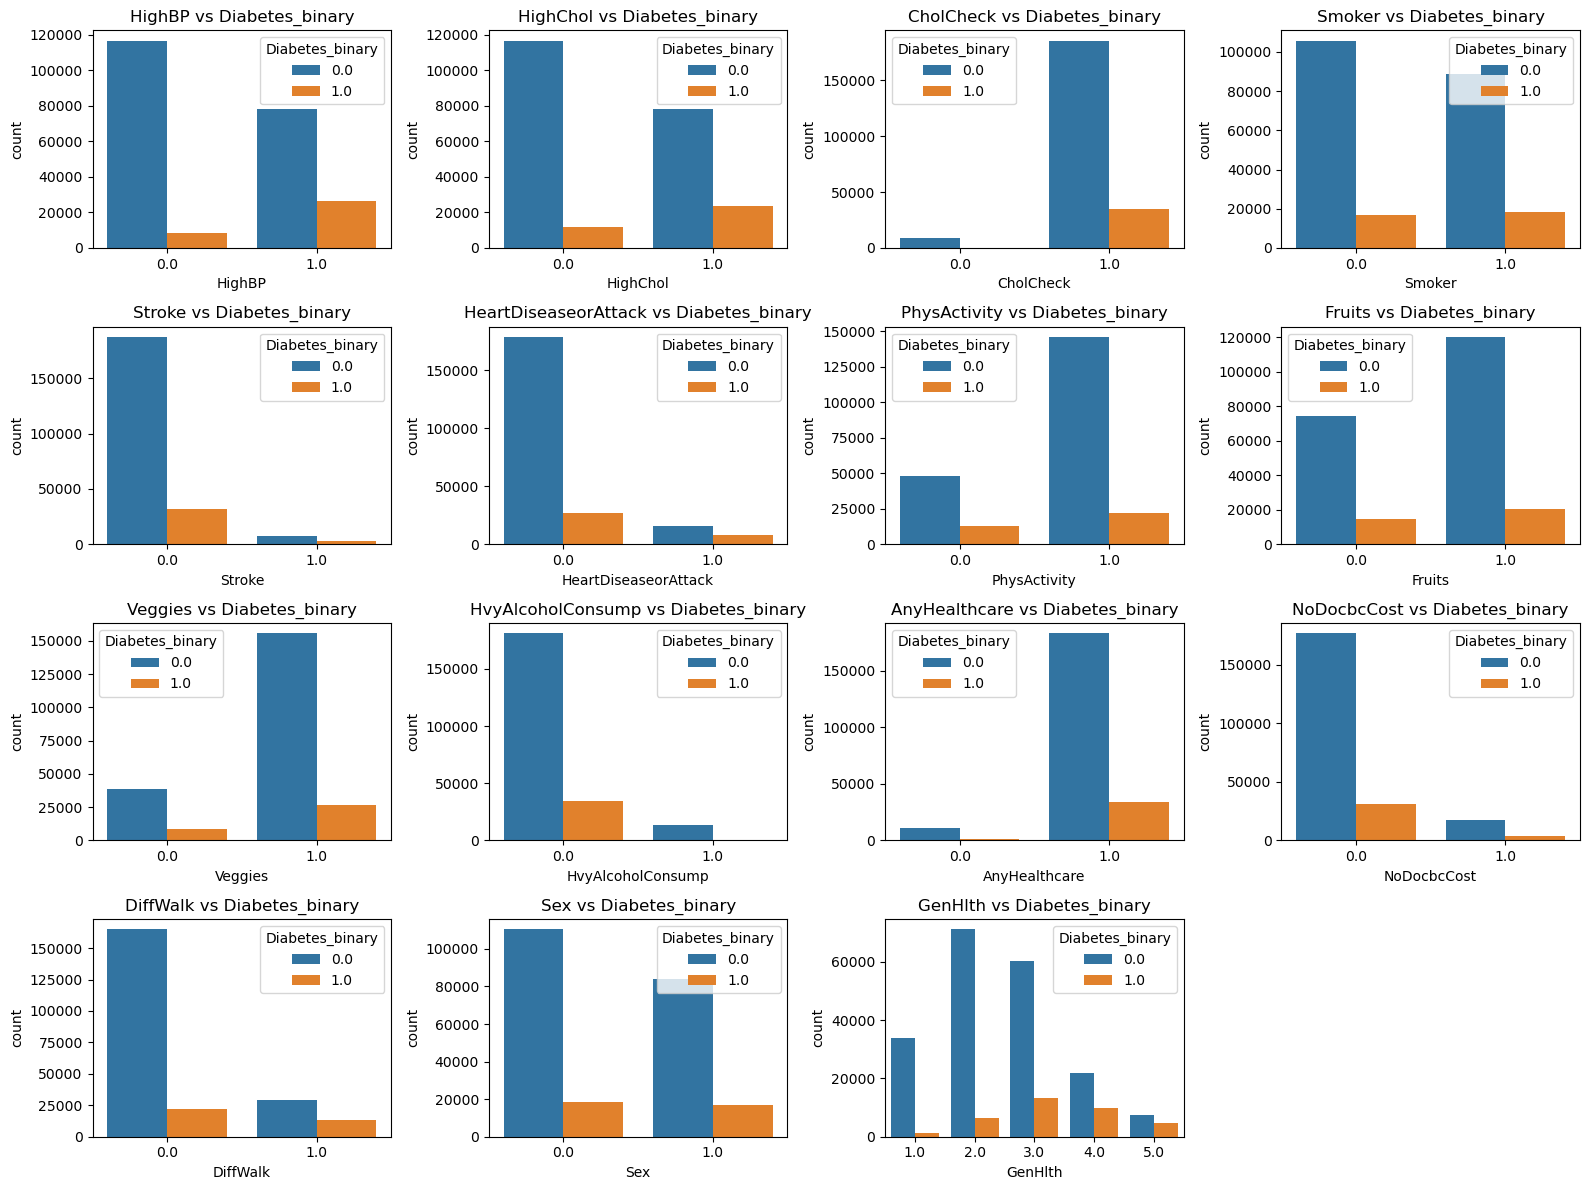

In [95]:
# Categorical variables with respect to target
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_vars, start=1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Diabetes_binary', data=diabetes)
    plt.title(f"{col} vs Diabetes_binary")
plt.tight_layout()
plt.savefig(f'images/catcomp.png')
plt.show()

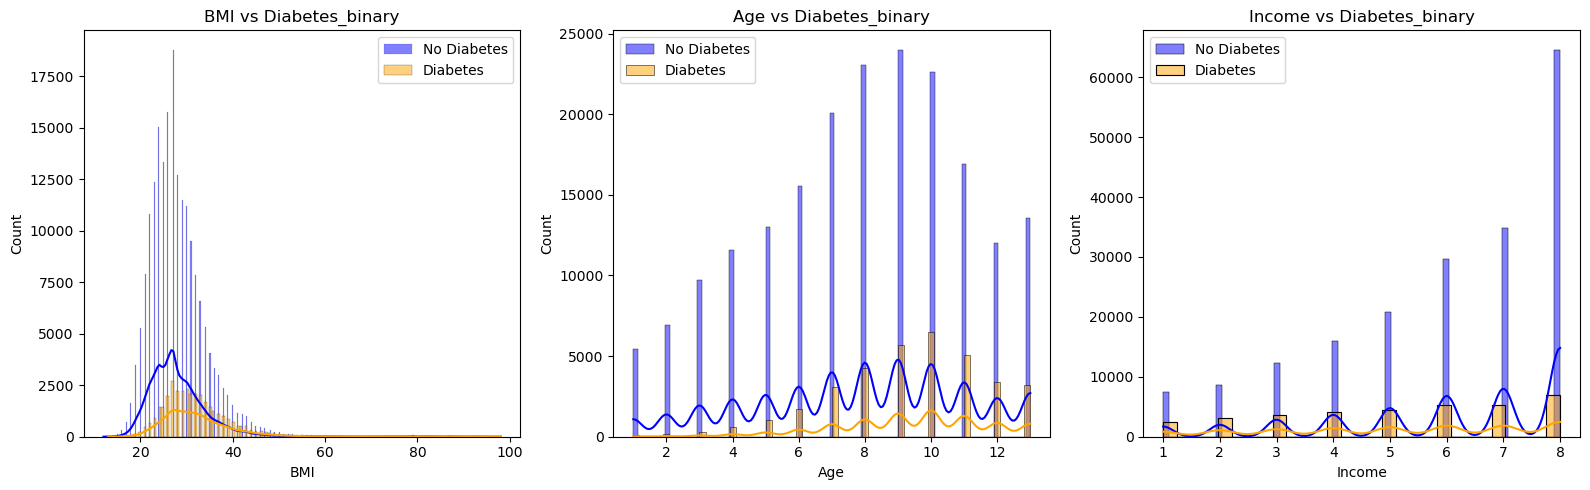

In [96]:
# Continuous variables with respect to target
plt.figure(figsize=(16, 5))
for i, col in enumerate(continuous_vars, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(diabetes[diabetes['Diabetes_binary']==0][col], kde=True, color='blue', label='No Diabetes', alpha=0.5)
    sns.histplot(diabetes[diabetes['Diabetes_binary']==1][col], kde=True, color='orange', label='Diabetes', alpha=0.5)
    plt.title(f"{col} vs Diabetes_binary")
    plt.legend()
plt.tight_layout()
plt.savefig(f'images/contin.png')
plt.show()

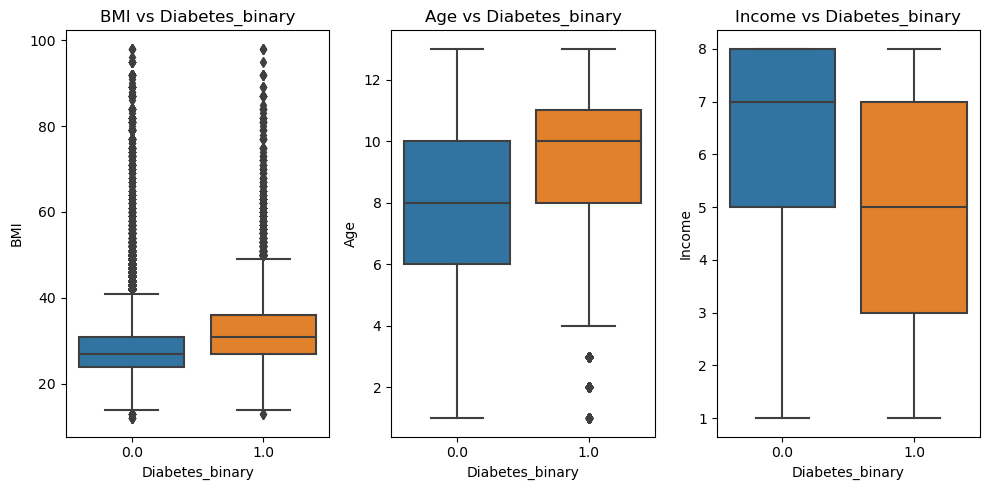

In [97]:
# Boxplot for continuous variables with respect to target
plt.figure(figsize=(10, 5))
for i, col in enumerate(continuous_vars, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Diabetes_binary', y=col, data=diabetes)
    plt.title(f"{col} vs Diabetes_binary")
plt.tight_layout()
plt.savefig(f'images/boxplot.png')
plt.show()

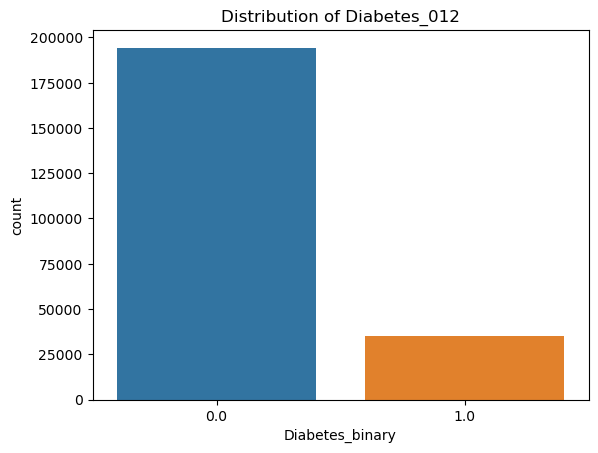

In [98]:
# Distribution of the target variable
sns.countplot(x='Diabetes_binary', data=diabetes)
plt.title('Distribution of Diabetes_012')
plt.savefig(f'images/distbar.png')
plt.show()

### The data is not evenly distributed! There are many more people without diabetes than with diabetes in this dataset. To compensate for this we are upsampling the minority class (1- diabetes).  

In [99]:
# Separate majority and minority classes
majority = diabetes[diabetes['Diabetes_binary'] == 0]
minority = diabetes[diabetes['Diabetes_binary'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Split the data into features and target
X_upsampled = upsampled.drop('Diabetes_binary', axis=1)
y_upsampled = upsampled['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Take a stratified sample of the data - I am doing this because my system cannot run SVM on this dataset as is!
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train, random_state=42)

In [100]:


# Define your features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                   'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                   'DiffWalk', 'Sex']
ordinal_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
continuous_features = ['BMI', 'Age']

# Define the transformers for each type of feature
binary_transformer = 'passthrough'  # No need to transform binary features
ordinal_transformer = OrdinalEncoder()
continuous_transformer = StandardScaler()

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('continuous', continuous_transformer, continuous_features)
    ]
)

## Modelling and Evaluation

### Baseline Accuracy

In [101]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy: {baseline_accuracy:.4f}")

Baseline accuracy: 0.5001


### Logistic Regression 

In [102]:

# Logistic Regression hyperparameter tuning
lr_params = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0],
    'logisticregression__penalty': ['l2']
}

lr_pipeline = Pipeline([
   ('preprocessor', preprocessor),
   ('logisticregression', LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced'))
])

lr_grid_search = GridSearchCV(lr_pipeline, param_grid=lr_params, cv=5, n_jobs=-1, scoring='recall')
lr_grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)

# Cross-validation scores for Logistic Regression
cv_scores = cross_val_score(lr_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best Logistic Regression model
lr_best = lr_grid_search.best_estimator_
y_pred_lr = lr_best.predict(X_test)

# Classification report for Logistic Regression
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_lr))


Best parameters for Logistic Regression: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}
Cross-validation recall scores: [0.75531197 0.7576907  0.75630846 0.75630063 0.74907583]
Mean recall score: 0.7549375184070851
Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     38918
         1.0       0.73      0.75      0.74     38833

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751



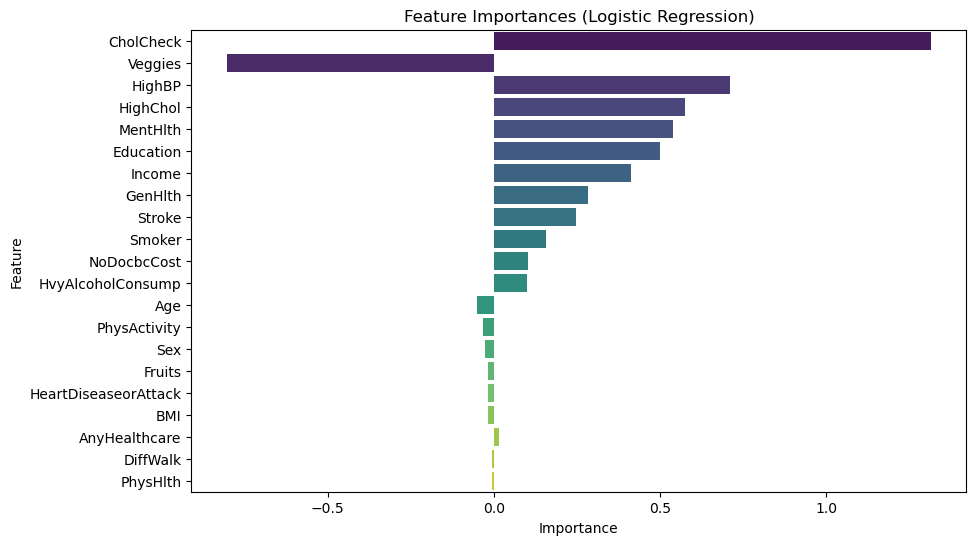

In [103]:
# Coefficients as feature importances
coefficients = lr_best.named_steps['logisticregression'].coef_[0]
features = X_train.columns
indices = np.argsort(np.abs(coefficients))[::-1]


lr_importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': coefficients[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lr_importance_df, palette='viridis')
plt.title("Feature Importances (Logistic Regression)")
plt.savefig(f'images/feature_lr.png')
plt.show()

Accuracy: 0.7345243147998096


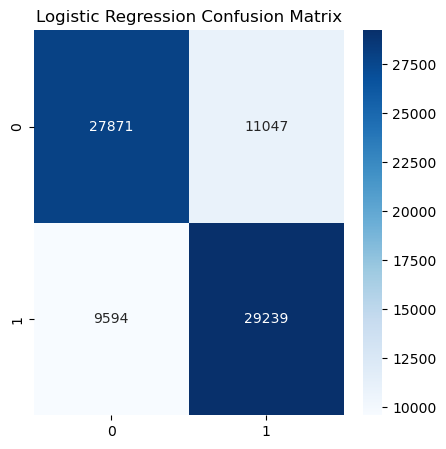

In [104]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title(f'Logistic Regression Confusion Matrix')
plt.show()

### K-Nearest Neighbors (KNN)

In [105]:

# KNeighborsClassifier hyperparameter tuning
knn_params = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kneighborsclassifier', KNeighborsClassifier())
])

knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=5, n_jobs=-1, scoring='recall')
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNeighborsClassifier:", knn_grid_search.best_params_)




Best parameters for KNeighborsClassifier: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}


In [106]:
# Cross-validation scores for KNeighborsClassifier
cv_scores = cross_val_score(knn_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best KNeighborsClassifier model
knn_best = knn_grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test)

# Classification report for KNeighborsClassifier
print("KNeighborsClassifier Model Evaluation:")
print(classification_report(y_test, y_pred_knn))

Cross-validation recall scores: [0.98579189 0.9863705  0.98534186 0.98714157 0.98598476]
Mean recall score: 0.9861261187538737
KNeighborsClassifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81     38918
         1.0       0.76      0.99      0.86     38833

    accuracy                           0.84     77751
   macro avg       0.87      0.84      0.83     77751
weighted avg       0.87      0.84      0.83     77751



Accuracy: 0.8381242684981544


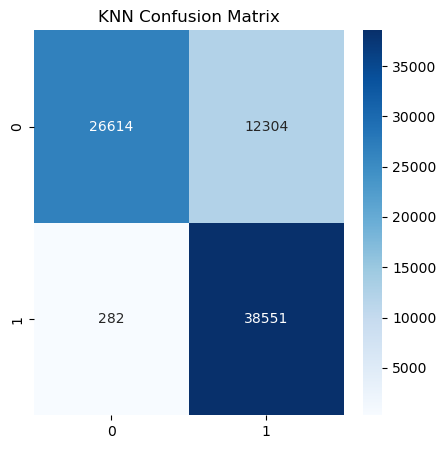

In [107]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title(f'KNN Confusion Matrix')
plt.show()

### Decision Tree

In [108]:

# DecisionTreeClassifier hyperparameter tuning
dt_params = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 10, 20]
}

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

#GridSearch for DecisionTree

dt_grid_search = GridSearchCV(dt_pipeline, param_grid=dt_params, cv=5, n_jobs=-1, scoring='recall')
dt_grid_search.fit(X_train, y_train)

print("Best parameters for DecisionTreeClassifier:", dt_grid_search.best_params_)

# Cross-validation scores for DecisionTreeClassifier
cv_scores = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best DecisionTreeClassifier model
dt_best = dt_grid_search.best_estimator_
y_pred_dt = dt_best.predict(X_test)

# Classification report for DecisionTreeClassifier
print("DecisionTreeClassifier Model Evaluation:")
print(classification_report(y_test, y_pred_dt))



Best parameters for DecisionTreeClassifier: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 2}
Cross-validation recall scores: [0.97605195 0.97881642 0.97688772 0.98058377 0.97907358]
Mean recall score: 0.9782826872208856
DecisionTreeClassifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     38918
         1.0       0.86      0.99      0.92     38833

    accuracy                           0.92     77751
   macro avg       0.92      0.92      0.91     77751
weighted avg       0.92      0.92      0.91     77751



Accuracy: 0.9153322786845185


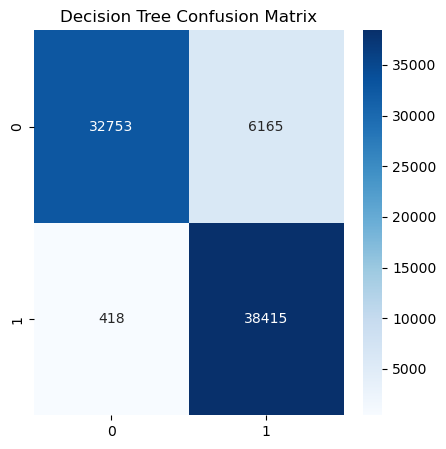

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title(f'Decision Tree Confusion Matrix')
plt.show()

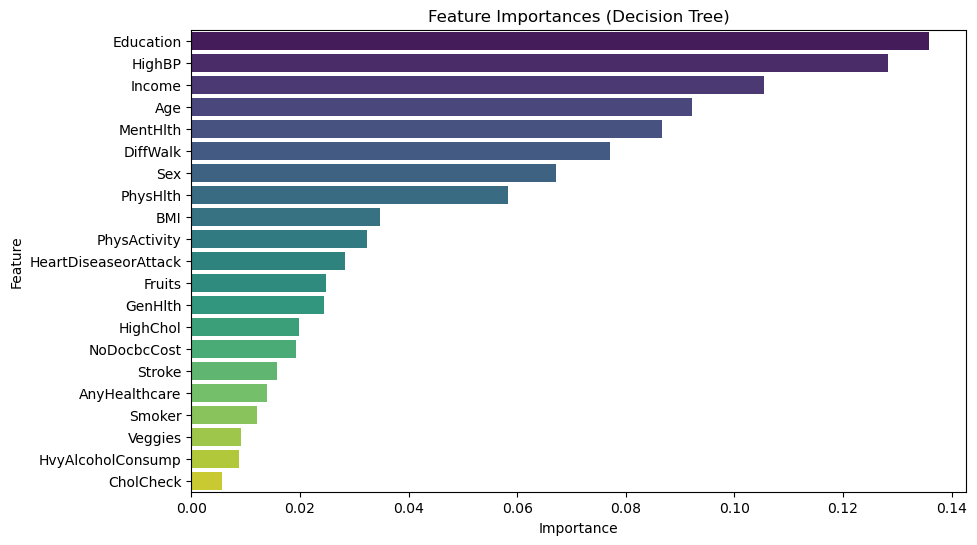

In [110]:
# Extract feature importances
importances = dt_best.named_steps['decisiontreeclassifier'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Create a DataFrame for easier plotting with Seaborn
importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': importances[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importances (Decision Tree)")
plt.savefig(f'images/feature_dt.png')
plt.show()


### Random Forest

In [111]:
# Random Forest hyperparameter tuning
rf_params = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=5, n_jobs=-1, scoring='recall')
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)


Best parameters for Random Forest: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}


In [112]:
# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores for Random Forest: {cv_scores_rf}")
print(f"Mean recall score for Random Forest: {np.mean(cv_scores_rf)}")

# Evaluate the best Random Forest model
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Classification report for Random Forest
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))


Cross-validation recall scores for Random Forest: [0.98052011 0.98109872 0.98116301 0.98231966 0.98183805]
Mean recall score for Random Forest: 0.9813879090916491
Random Forest Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     38918
         1.0       0.91      0.99      0.95     38833

    accuracy                           0.94     77751
   macro avg       0.95      0.94      0.94     77751
weighted avg       0.95      0.94      0.94     77751



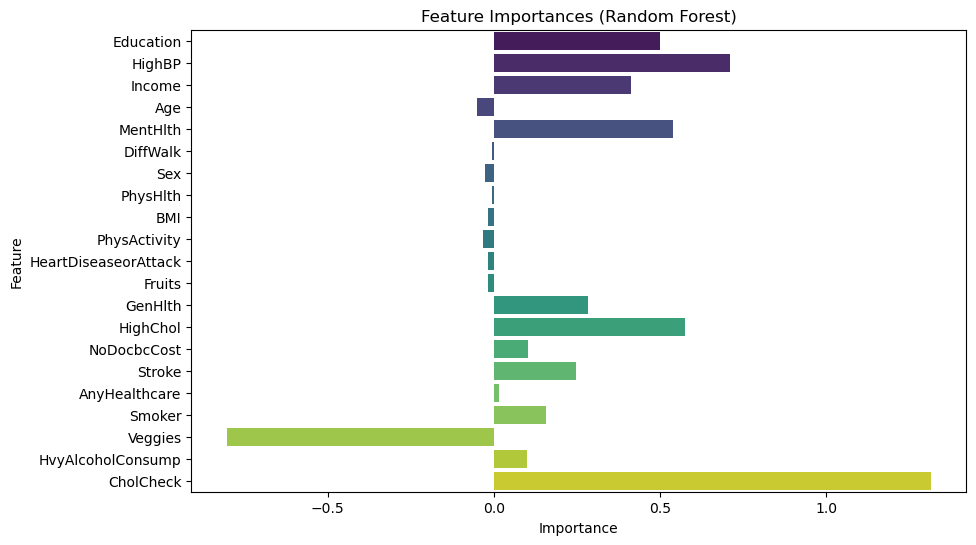

In [113]:
# Feature importances for Random Forest
rf_importances = rf_best.named_steps['randomforestclassifier'].feature_importances_
rf_features = X_train.columns
rf_indices = np.argsort(rf_importances)[::-1]

rf_importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': coefficients[indices]
})

# Plotting feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.savefig(f'images/feature_rf.png')
plt.show()

Accuracy of Random Forest: 0.9438592429679361


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

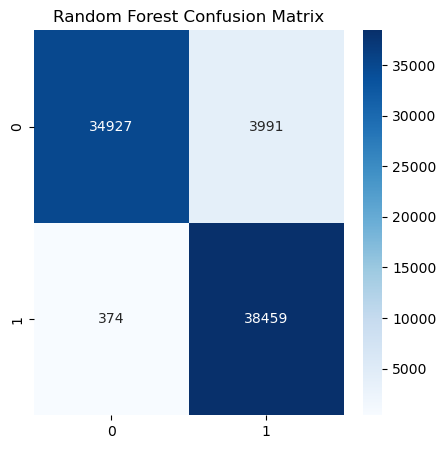

In [114]:
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')


### Support Vector Machine (SVM)

In [115]:
# Custom OrdinalEncoder to handle unknown categories
class OrdinalEncoderHandleUnknown(OrdinalEncoder):
    def fit(self, X, y=None):
        super().fit(X, y)
        self.categories_ = [np.append(cat, 'Unknown') for cat in self.categories_]
        return self

    def transform(self, X):
        X_trans = super().transform(X)
        for i in range(X.shape[1]):
            X_trans[:, i] = np.where(X[:, i] not in self.categories_[i], len(self.categories_[i]) - 1, X_trans[:, i])
        return X_trans



# Define the transformers for each type of feature
ordinal_transformer = OrdinalEncoderHandleUnknown()


# Combine the transformers into a ColumnTransformer
preprocessor_svm = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('continuous', continuous_transformer, continuous_features)
    ]
)

# Define the SVM pipeline
svm_pipeline_svm = Pipeline([
    ('preprocessor', preprocessor_svm),
    ('svc', SVC(class_weight='balanced', random_state=42))
])

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Take a stratified sample of the data - I am doing this because my system cannot run SVM on this dataset as is!
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train, random_state=42)

# Define a smaller parameter grid
svm_params = {
    'svc__C': [0.1, 1],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale']
}

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(class_weight='balanced', random_state=42))
])

svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_params, cv=3, n_jobs=-1, scoring='recall')
svm_grid_search.fit(X_sample, y_sample)

print("Best parameters for SVM:", svm_grid_search.best_params_)


/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/Users/anjanacox/anaconda3/lib/py

Best parameters for SVM: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [118]:
# Cross-validation scores for SVM
cv_scores_svm = cross_val_score(svm_grid_search.best_estimator_, X_train, y_train, cv=3, scoring='recall', n_jobs=-1)
print(f"Cross-validation recall scores for SVM: {cv_scores_svm}")
print(f"Mean recall score for SVM: {np.mean(cv_scores_svm)}")

# Evaluate the best SVM model
svm_best = svm_grid_search.best_estimator_
y_pred_svm = svm_best.predict(X_test)

# Classification report for SVM
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))


Cross-validation recall scores for SVM: [0.78109088 0.78155377 0.77405107]
Mean recall score for SVM: 0.7788985753227383
SVM Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72     38918
         1.0       0.72      0.78      0.75     38833

    accuracy                           0.74     77751
   macro avg       0.74      0.74      0.73     77751
weighted avg       0.74      0.74      0.73     77751



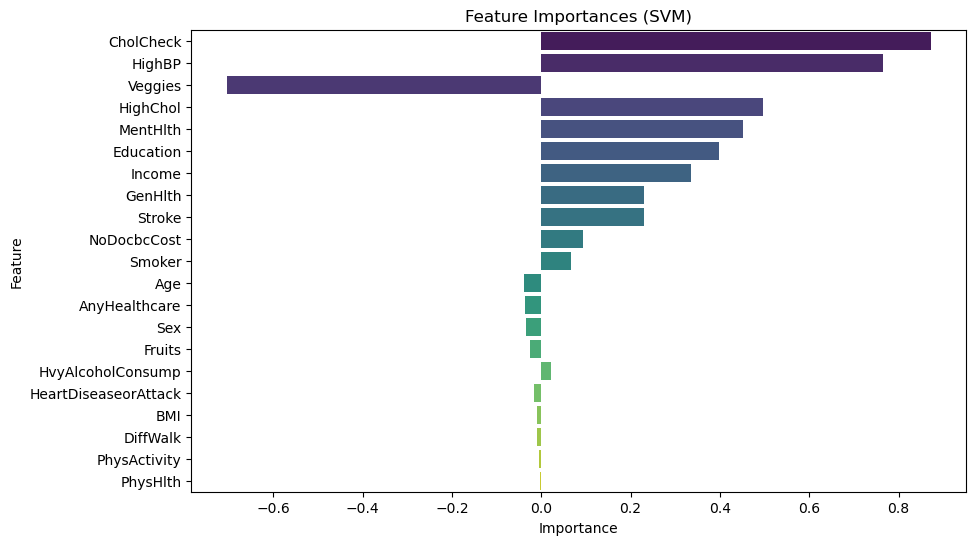

In [119]:
# Feature importance for SVM with linear kernel
if 'linear' in svm_grid_search.best_params_['svc__kernel']:
    svm_coefficients = svm_best.named_steps['svc'].coef_[0]
    svm_features = X_train.columns
    svm_indices = np.argsort(np.abs(svm_coefficients))[::-1]

    svm_importance_df = pd.DataFrame({
        'Feature': [svm_features[i] for i in svm_indices],
        'Importance': svm_coefficients[svm_indices]
    })

    # Plotting feature importances for SVM
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=svm_importance_df, palette='viridis')
    plt.title("Feature Importances (SVM)")
    plt.savefig(f'images/feature_svm.png')
    plt.show()


Accuracy of SVM: 0.7350902239199496


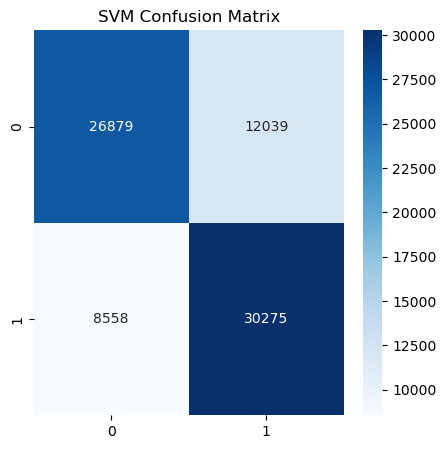

In [120]:
print("Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

## Comparision of Models Metrics

In [121]:
# Calculate metrics for each model
models = ["Logistic Regression", "SVM", "KNN", "Random Forest", "Decision Tree"]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model, y_pred in zip(models, [y_pred_lr, y_pred_svm, y_pred_knn, y_pred_rf, y_pred_dt]):
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})    


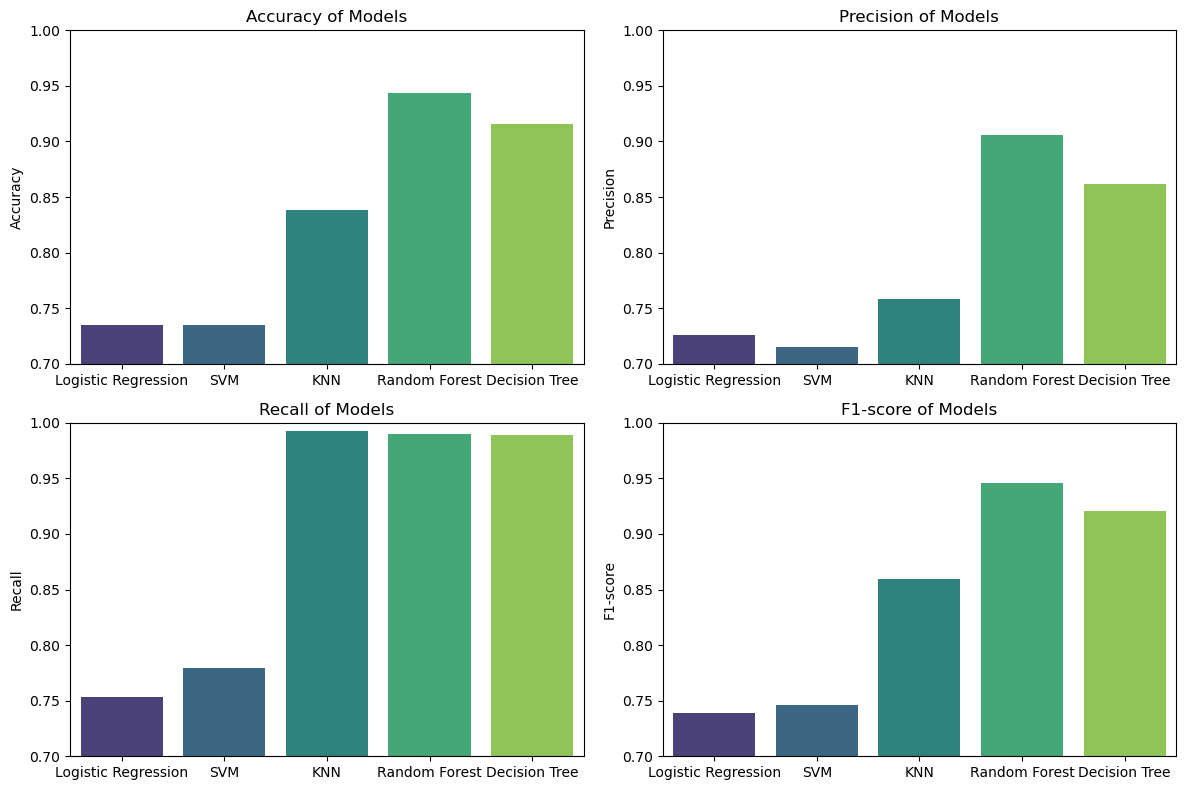

In [122]:
# Plotting
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=precision_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('Precision')
plt.title('Precision of Models')

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=recall_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('Recall')
plt.title('Recall of Models')

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x=models, y=f1_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('F1-score')
plt.title('F1-score of Models')

plt.tight_layout()
plt.savefig(f'images/comparison_metrics.png')
plt.show()

## Results and Conclusion

Random Forest did the best on all the metrics except for Recall. KNN did the best for recall. Since Random Forest seems to have performed the best overall, the recommendations will be made using this model.


#### Observations from Feature Importance:
1. Factors that increase likelihood of diabetes:
    1. Cholestoral Check: Those that have cheked their cholestoral in the last 5 years are more likely to be diabetic.
    2. High Blood Pressure and High Cholesterol: Patients who have high blood pressure or high cholesterol are more likely to have prediabetes/diabetes.
    3. General Health: Those that have poor general health are more likely to have prediabetes/diabetes.
    
2. Factors that decrease likelihood of diabetes:
    1. Eating Fruits and Vegetables decreases the likelihood of getting diabetes!
    2. Physical activity decreases the likelihood.
    
    
#### Conclusion:
Individuals who already have other conditions such as High Blood Pressure, High Cholestoral, Mental Health issues are more likely to be prediabetic/diabetic. It is important for those individuals to get early intervention. Factors that could improve an individuals chances of not getting diabetes is eating more fruits and vegetables and being more active.

In [123]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.734524,0.725786,0.752942,0.739114
1,SVM,0.735090,0.715484,0.779620,0.746177
2,KNN,0.838124,0.758057,0.992738,0.859669
3,Random Forest,0.943859,0.905984,0.990369,0.946299
4,Decision Tree,0.915332,0.861709,0.989236,0.921079
